In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:\\Users\\vattam ajay\\datasets\\creditcard.csv")

In [3]:
data.head()  

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.drop(['Time'], axis=1, inplace=True)

In [5]:
data.shape   

(284807, 30)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [7]:
data['Amount'].isna().sum()    #Finding Missing Values In the Specific Column

0

In [8]:
data.isna().sum()     #The isna.sum() is used to count the total numbers of missing values in the data set. Example: Finding Missing Values In the Whole Data Set

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
min(data.Amount)

0.0

In [10]:
max(data.Amount)

25691.16

In [11]:
data.shape

(284807, 30)

In [12]:
data.drop_duplicates(inplace=True)   #to remove any duplicates

In [13]:
data.shape       

(275663, 30)

# We now have proper data with no duplicate, no missing. Let’s now split it for our model building.

In [15]:
# Train & Test Split:
# Before splitting train & test — we need to define dependent and independent variables. The dependent variable is also known as X and the independent variable is known as y.

In [16]:
x = data.drop('Class', axis = 1).values
y = data['Class'].values

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc = StandardScaler()

In [19]:
x= sc.fit_transform(x)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
#Now, let split our train and test data.

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =.2)

In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(220530, 29)
(55133, 29)
(220530,)
(55133,)


# decision tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [25]:
#create decision tree clasifier object

clf = DecisionTreeClassifier()

In [26]:
clf

DecisionTreeClassifier()

In [27]:
#train decision tree classifier

clf = clf.fit(x_train,y_train)

In [28]:
# predict the response for test dataset
y_pred = clf.predict(x_test)

In [29]:
#accuracy of train data

clf.score(x_train,y_train)

1.0

In [30]:
#accuracy of test data 

clf.score(x_test,y_test)

0.9993288955797798

In [31]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9993288955797798


In [32]:
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55048
           1       0.76      0.82      0.79        85

    accuracy                           1.00     55133
   macro avg       0.88      0.91      0.90     55133
weighted avg       1.00      1.00      1.00     55133



In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =.2)

In [34]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(220530, 29)
(55133, 29)
(220530,)
(55133,)


# KNN

In [35]:
#import algorithm

from sklearn.neighbors import KNeighborsClassifier

In [36]:
#start with random value of k

knn= KNeighborsClassifier(n_neighbors=3)

In [37]:
knn

KNeighborsClassifier(n_neighbors=3)

In [38]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [39]:
pred=knn.predict(x_test)

C:\Users\vattam ajay\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [40]:
pd.Series(pred).value_counts()

0    55066
1       67
dtype: int64

In [42]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

<AxesSubplot:>

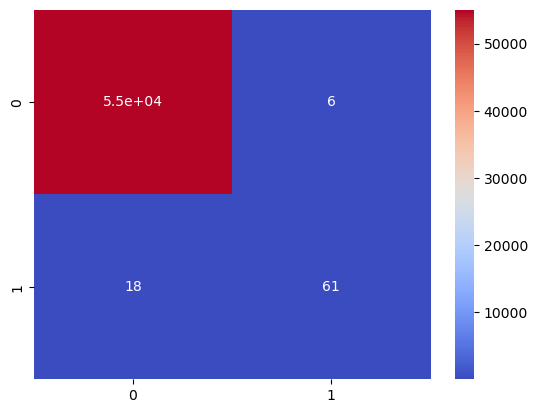

In [43]:
sns.heatmap(confusion_matrix(y_test,pred),cmap='coolwarm',annot=True)

In [44]:
confusion_matrix(y_test,pred)

array([[55048,     6],
       [   18,    61]], dtype=int64)

In [45]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55054
           1       0.91      0.77      0.84        79

    accuracy                           1.00     55133
   macro avg       0.96      0.89      0.92     55133
weighted avg       1.00      1.00      1.00     55133



In [46]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9970253750022673


# logistic regression 

In [47]:
from sklearn.linear_model import LogisticRegression

In [52]:
lr=LogisticRegression()

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [54]:
lr.fit(x_train,y_train)

LogisticRegression()

In [55]:
pred=lr.predict(x_test)

In [56]:
pred[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [57]:
y_test[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [58]:
print(confusion_matrix(pred,y_test))

[[55038    35]
 [    7    53]]


In [59]:
y_test.shape

(55133,)

<AxesSubplot:>

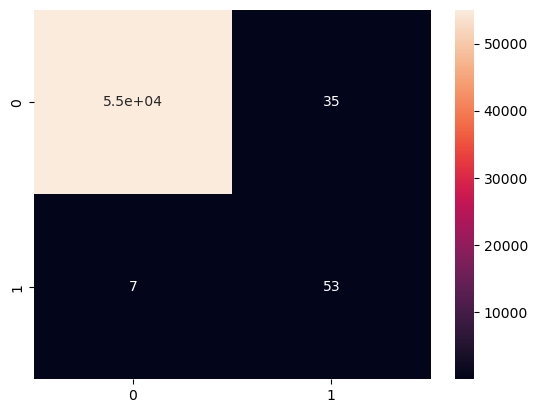

In [60]:
sns.heatmap(confusion_matrix(pred,y_test),annot=True)

In [61]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55073
           1       0.60      0.88      0.72        60

    accuracy                           1.00     55133
   macro avg       0.80      0.94      0.86     55133
weighted avg       1.00      1.00      1.00     55133



In [62]:
print(accuracy_score(pred,y_test))

0.9992382057932636
